In [1]:
from latentcor import gen_data, get_tps, latentcor
simdata = gen_data(n = 100, tps = ["ter", "con"])

In [2]:
len(simdata)

2

In [3]:
print(simdata[0][ : 6, : ])

[[ 0.          0.15938097]
 [ 2.         -0.10868312]
 [ 2.          0.83727245]
 [ 1.         -0.02427658]
 [ 2.          0.20950102]
 [ 1.         -0.02753507]]


In [4]:
print(simdata[1])

None


In [5]:
estimate = latentcor(simdata[0], tps = ["ter", "con"])

In [6]:
len(estimate)

5

In [7]:
estimate[4]

array([[0.3, nan],
       [0.8, nan]])

In [8]:
estimate[3]

array([[1.        , 0.23070706],
       [0.23070706, 1.        ]], dtype=float32)

In [9]:
estimate[1]

array([[1.        , 0.42174104],
       [0.42174104, 1.        ]], dtype=float32)

In [10]:
estimate[0]

array([[1.       , 0.4213193],
       [0.4213193, 1.       ]])

In [11]:
estimate[2]

In [12]:
import numpy as np
import pandas as pd
from pyreadr import read_r

In [13]:
housing = read_r('housing.rdata')['housing']

In [14]:
print(housing.iloc[ :6, : ])

    price lotsize bedrooms bathrms stories driveway recroom fullbase gashw  \
1   42000    5850        3       1       2      yes      no      yes    no   
2   38500    4000        2       1       1      yes      no       no    no   
3   49500    3060        3       1       1      yes      no       no    no   
4   60500    6650        3       1       2      yes     yes       no    no   
5   61000    6360        2       1       1      yes      no       no    no   
6   66000    4160        3       1       1      yes     yes      yes    no   

  airco garagepl prefarea  
1    no        1       no  
2    no        0       no  
3    no        0       no  
4    no        0       no  
5    no        0       no  
6   yes        0       no  


In [15]:
print(np.unique(housing['bedrooms']))
print(np.unique(housing['bathrms']))
print(np.unique(housing['stories']))
print(np.unique(housing['driveway']))
print(np.unique(housing['recroom']))
print(np.unique(housing['fullbase']))
print(np.unique(housing['gashw']))
print(np.unique(housing['airco']))
print(np.unique(housing['garagepl']))
print(np.unique(housing['prefarea']))

['1' '2' '3' '4' '5' '6']
['1' '2' '3' '4']
['1' '2' '3' '4']
['no' 'yes']
['no' 'yes']
['no' 'yes']
['no' 'yes']
['no' 'yes']
['0' '1' '2' '3']
['no' 'yes']


In [16]:
housing = housing.replace('no', 0)

In [17]:
housing = housing.replace('yes', 1)

In [18]:
print(housing)

      price lotsize bedrooms bathrms stories  driveway  recroom  fullbase  \
1     42000    5850        3       1       2         1        0         1   
2     38500    4000        2       1       1         1        0         0   
3     49500    3060        3       1       1         1        0         0   
4     60500    6650        3       1       2         1        1         0   
5     61000    6360        2       1       1         1        0         0   
..      ...     ...      ...     ...     ...       ...      ...       ...   
542   91500    4800        3       2       4         1        1         0   
543   94000    6000        3       2       4         1        0         0   
544  103000    6000        3       2       4         1        1         0   
545  105000    6000        3       2       2         1        1         0   
546  105000    6000        3       1       2         1        0         0   

     gashw  airco garagepl  prefarea  
1        0      0        1         0

In [19]:
print(housing.iloc[ :6, : ])

    price lotsize bedrooms bathrms stories  driveway  recroom  fullbase  \
1   42000    5850        3       1       2         1        0         1   
2   38500    4000        2       1       1         1        0         0   
3   49500    3060        3       1       1         1        0         0   
4   60500    6650        3       1       2         1        1         0   
5   61000    6360        2       1       1         1        0         0   
6   66000    4160        3       1       1         1        1         1   

   gashw  airco garagepl  prefarea  
1      0      0        1         0  
2      0      0        0         0  
3      0      0        0         0  
4      0      0        0         0  
5      0      0        0         0  
6      0      1        0         0  


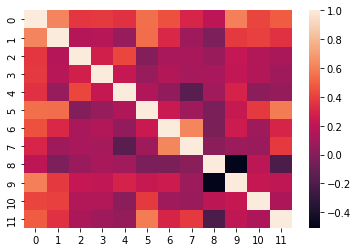

In [26]:
from latentcor import latentcor, get_tps
estimate_housing = latentcor(housing, tps = ["con", "con", "con", "con",
                  "con", "bin", "bin", "bin", "bin", "bin", "tru", "bin"], use_nearPD=False, method = "original", showplot = True)

In [40]:
get_tps(housing)

ordinal levels between 4 and 10 will be approximated by either countinuous or truncated type.
ordinal levels between 4 and 10 will be approximated by either countinuous or truncated type.
ordinal levels between 4 and 10 will be approximated by either countinuous or truncated type.
ordinal levels between 4 and 10 will be approximated by either countinuous or truncated type.


array(['con', 'con', 'con', 'con', 'con', 'bin', 'bin', 'bin', 'bin',
       'bin', 'tru', 'bin'], dtype='<U3')

Text(0.5, 1.0, 'Histogram of garagepl')

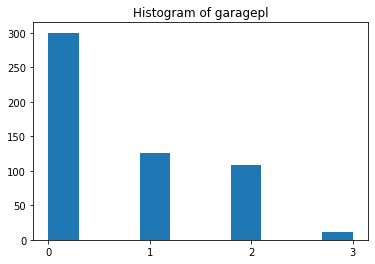

In [27]:
import matplotlib.pyplot as plt
plt.hist(np.sort(housing['garagepl']))
plt.title('Histogram of garagepl')

In [41]:
len(estimate_housing)

5

In [42]:
estimate_housing[4]

array([[       nan,        nan,        nan,        nan,        nan,
        0.14102564, 0.82234432, 0.65018315, 0.95421245, 0.68315018,
        0.54945055, 0.76556777],
       [       nan,        nan,        nan,        nan,        nan,
               nan,        nan,        nan,        nan,        nan,
               nan,        nan]])

In [43]:
np.round(estimate_housing[3], decimals=3)

array([[ 1.   ,  0.42 ,  0.238,  0.247,  0.227,  0.137,  0.132,  0.126,
         0.021,  0.247,  0.218,  0.17 ],
       [ 0.42 ,  1.   ,  0.105,  0.11 ,  0.038,  0.135,  0.093,  0.035,
        -0.003,  0.153,  0.213,  0.121],
       [ 0.238,  0.105,  1.   ,  0.174,  0.277, -0.002,  0.036,  0.051,
         0.008,  0.088,  0.079,  0.044],
       [ 0.247,  0.11 ,  0.174,  1.   ,  0.144,  0.015,  0.046,  0.046,
         0.013,  0.084,  0.081,  0.029],
       [ 0.227,  0.038,  0.277,  0.144,  1.   ,  0.036,  0.012, -0.068,
         0.01 ,  0.118,  0.009,  0.018],
       [ 0.137,  0.135, -0.002,  0.015,  0.036,  1.   ,  0.025,  0.014,
        -0.002,  0.034,  0.071,  0.059],
       [ 0.132,  0.093,  0.036,  0.046,  0.012,  0.025,  1.   ,  0.136,
        -0.002,  0.049,  0.02 ,  0.052],
       [ 0.126,  0.035,  0.051,  0.046, -0.068,  0.014,  0.136,  1.   ,
         0.001,  0.02 ,  0.024,  0.093],
       [ 0.021, -0.003,  0.008,  0.013,  0.01 , -0.002, -0.002,  0.001,
         1.   , -0.025, 

In [27]:
np.round(estimate_housing[1], decimals=3)

array([[ 1.   ,  0.612,  0.365,  0.378,  0.349,  0.546,  0.449,  0.3  ,
         0.191,  0.599,  0.411,  0.486],
       [ 0.612,  1.   ,  0.164,  0.172,  0.06 ,  0.537,  0.315,  0.083,
        -0.031,  0.378,  0.402,  0.347],
       [ 0.365,  0.164,  1.   ,  0.27 ,  0.421, -0.006,  0.122,  0.121,
         0.073,  0.218,  0.152,  0.128],
       [ 0.378,  0.172,  0.27 ,  1.   ,  0.224,  0.06 ,  0.155,  0.111,
         0.118,  0.208,  0.156,  0.084],
       [ 0.349,  0.06 ,  0.421,  0.224,  1.   ,  0.144,  0.042, -0.162,
         0.094,  0.292,  0.017,  0.053],
       [ 0.546,  0.537, -0.006,  0.06 ,  0.144,  1.   ,  0.24 ,  0.089,
        -0.039,  0.231,  0.38 ,  0.582],
       [ 0.449,  0.315,  0.122,  0.155,  0.042,  0.24 ,  1.   ,  0.619,
        -0.033,  0.248,  0.081,  0.297],
       [ 0.3  ,  0.083,  0.121,  0.111, -0.162,  0.089,  0.619,  1.   ,
         0.013,  0.076,  0.069,  0.381],
       [ 0.191, -0.031,  0.073,  0.118,  0.094, -0.039, -0.033,  0.013,
         1.   , -0.508, 

In [45]:
np.round(estimate_housing[0], decimals=3)

array([[ 1.   ,  0.613,  0.366,  0.382,  0.362,  0.551,  0.463,  0.307,
         0.071,  0.513,  0.456,  0.406],
       [ 0.613,  1.   ,  0.163,  0.171,  0.06 ,  0.53 ,  0.319,  0.08 ,
        -0.032,  0.377,  0.403,  0.35 ],
       [ 0.366,  0.163,  1.   ,  0.271,  0.42 ,  0.016,  0.109,  0.13 ,
         0.066,  0.211,  0.152,  0.108],
       [ 0.382,  0.171,  0.271,  1.   ,  0.225,  0.069,  0.151,  0.116,
         0.106,  0.198,  0.159,  0.07 ],
       [ 0.362,  0.06 ,  0.42 ,  0.225,  1.   ,  0.14 ,  0.05 , -0.162,
         0.058,  0.267,  0.031,  0.034],
       [ 0.551,  0.53 ,  0.016,  0.069,  0.14 ,  1.   ,  0.655,  0.368,
        -0.526,  0.612,  0.278,  0.858],
       [ 0.463,  0.319,  0.109,  0.151,  0.05 ,  0.655,  1.   ,  0.791,
        -0.081,  0.357,  0.155,  0.408],
       [ 0.307,  0.08 ,  0.13 ,  0.116, -0.162,  0.368,  0.791,  1.   ,
         0.   ,  0.055,  0.08 ,  0.404],
       [ 0.071, -0.032,  0.066,  0.106,  0.058, -0.526, -0.081,  0.   ,
         1.   , -0.605, 

In [50]:
estimate_housing[2]
plt.show()